In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import drive

In [ ]:
drive.mount('/gdrive')
os.listdir("/gdrive/MyDrive/RESULTATS TNT")

Mounted at /gdrive


['Bases de données.xlsx',
 'Bases de données.csv',
 'Base_de_données_outliers.csv',
 'Base_de_données_standardisées.csv',
 'Base_de_données_SMOTE.csv',
 'Base_de_donnees_Augmentees.csv',
 'Base_de_donnees_pca_variables_uniques.csv',
 'Base_correlation_FSM.csv']

In [ ]:
Data=pd.read_csv("/gdrive/MyDrive/RESULTATS TNT/Base_de_donnees_pca_variables_uniques.csv")
Data

,Slope (°),Température(°C),Hauteur_Emetteur(m),Pression_athmosphérique (hPa),Azimut(°),Vitesse_Vent (m/s),Distance emetteur-dernier batiment(m),Nombre de batiment entre l'émission et la réception,Humidité relative (%),Direction_Vent (°),Altitude,Rugosité à la réception (m),Power_Tx(dBm),Emetteur_Latitude,Fréquence_(MHz),ID_Emetteur_Associe,Type_Environnement,FSM
0,-0.463373,-1.349914,1.455445,0.704125,2.133710,0.152706,-0.275438,-0.962867,-0.440079,-1.524169,-0.701604,-0.533909,0.711606,-0.680195,0.711606,1,0,0.364734
1,-0.501523,-0.474986,1.455445,0.283575,-0.401852,0.152706,-0.237428,-0.040193,-0.665843,-1.369632,-0.716171,-0.564751,0.711606,-0.714824,0.711606,0,0,-1.224730
2,-0.485483,1.036252,1.455445,-1.398627,-0.455403,-0.413675,-0.233860,-0.008377,-0.835165,0.046958,-0.716171,-0.554845,0.711606,-0.714824,0.711606,0,0,-0.599199
3,-0.435612,-1.349914,1.455445,0.914400,2.133710,0.152706,-0.264934,-0.899234,0.011448,-1.524169,-0.701604,-0.504620,0.711606,-0.680195,0.711606,1,0,-0.291561
4,-0.478746,-1.349914,1.455445,0.914400,-0.380107,0.152706,-0.280331,-0.199275,0.011448,-1.524169,-0.708887,-0.545230,0.711606,-0.714824,0.711606,0,0,-0.009559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.539000,-0.994398,-1.215555,-0.911805,-0.477084,1.140134,-0.115815,-1.238335,-1.514182,-0.922220,1.513531,1.731165,0.721603,1.441273,-1.294130,2,1,1.029960
1466,1.149460,2.234625,-1.056310,1.779573,-0.719017,-0.519387,0.073880,-1.444836,-1.547490,-0.859805,1.568444,1.529340,-1.254948,1.605824,-1.205935,2,1,0.932458
1467,1.078855,1.610725,-0.817466,0.704502,-0.502746,0.341692,0.097104,-1.184053,-1.588282,-0.593575,1.609447,1.508647,-1.292461,1.350553,-1.195347,2,1,0.859006
1468,1.254865,1.780331,-0.273109,0.808113,-0.572536,-0.320481,3.368670,-1.426542,-1.615191,-2.047887,1.518353,1.601093,-1.524375,1.641346,-1.185892,2,1,0.857695


# **Régression Linéaire**

Résultats Régression Linéaire :
   sample_size        R2      RMSE
0          200  0.047535  0.665163
1          400  0.414935  0.775573
2          600  0.484720  0.714255
3          800  0.450727  0.822678
4         1000  0.479464  0.817661
5         1200  0.491940  0.792438
6         1400  0.467793  0.795493


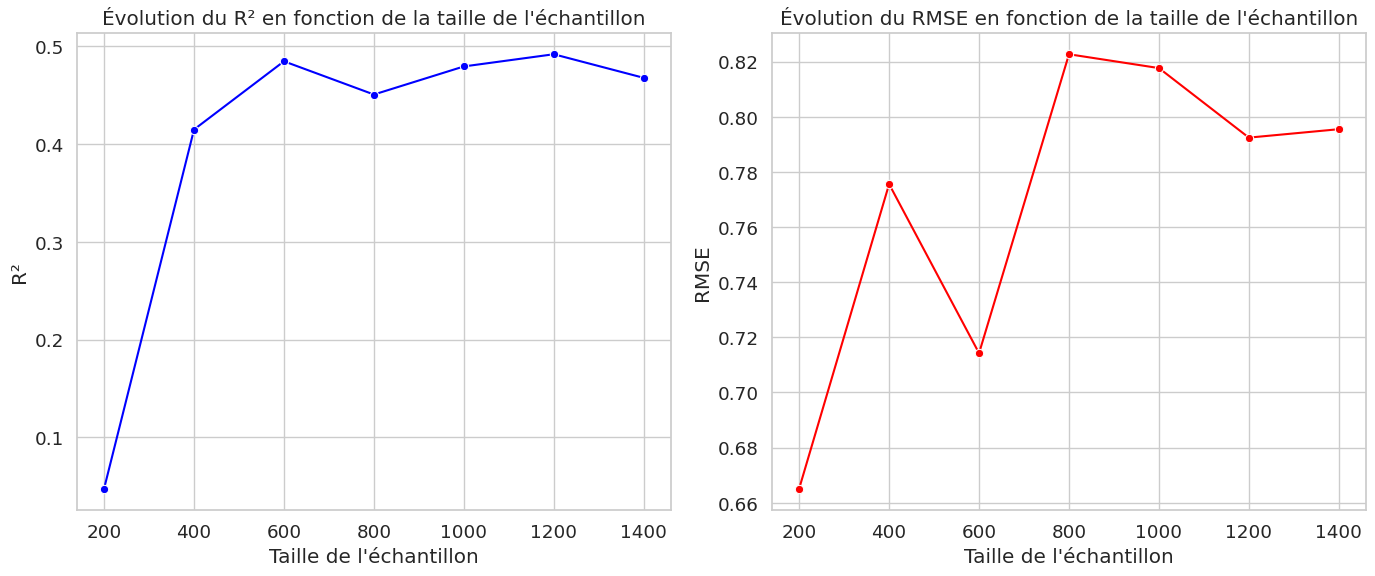

In [ ]:
X = Data.drop(columns=['FSM'])
y = Data['FSM']

# Dictionnaire pour enregistrer les résultats
results_lr = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    X_sample = X.iloc[:size]
    y_sample = y.iloc[:size]

    # Séparation en train et test (80% pour l'entraînement, 20% pour le test)
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    # Modèle de régression linéaire
    modelRL = LinearRegression()
    modelRL.fit(X_train, y_train)

    # Prédictions et calcul des métriques
    y_pred = modelRL.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Enregistrement des résultats dans le dictionnaire
    results_lr['sample_size'].append(size)
    results_lr['R2'].append(r2)
    results_lr['RMSE'].append(rmse)

# Convertir le dictionnaire en DataFrame avec index
df_results_lr = pd.DataFrame(results_lr)

# Affichage des résultats
print("Résultats Régression Linéaire :")
print(df_results_lr)

# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

# Création de la figure pour afficher les deux graphiques
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_lr, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_lr, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


# **XGBOOST**

Résultats XGBoost Regressor :
   sample_size        R2      RMSE
0          200  0.143819  0.630647
1          400  0.544203  0.684552
2          600  0.534086  0.738176
3          800  0.366522  0.838469
4         1000  0.284240  0.982757
5         1200  0.440266  0.846816
6         1400  0.454393  0.887450


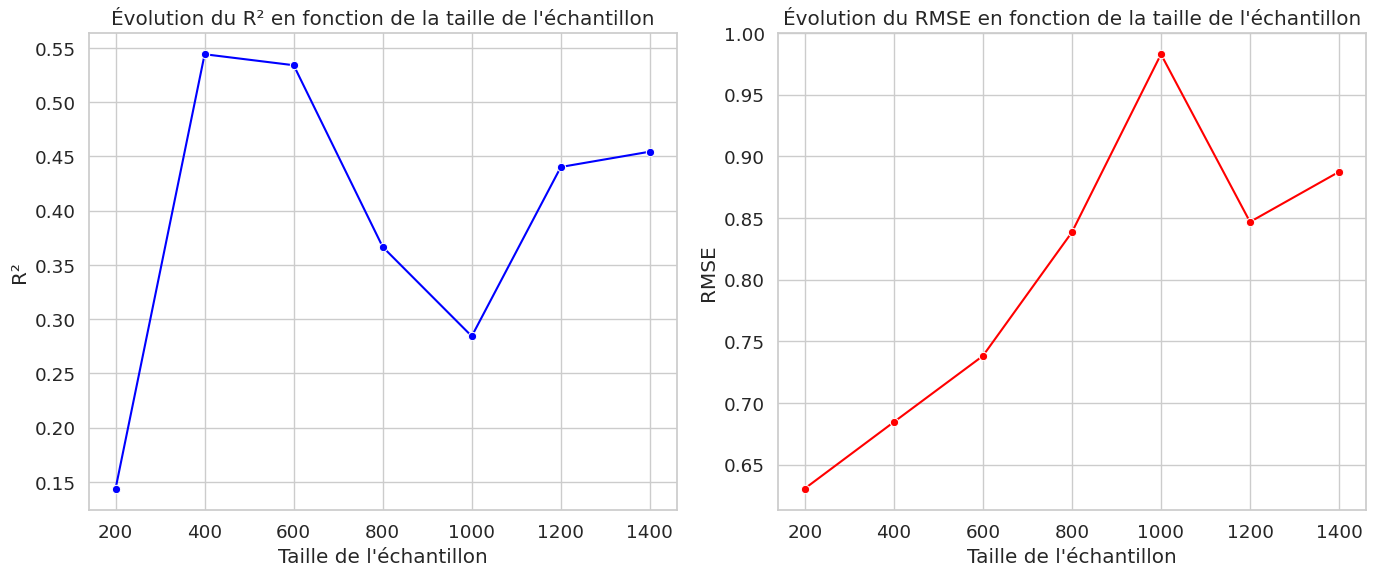

In [ ]:
X = Data.drop(columns=['FSM'])
y = Data['FSM']

# Dictionnaire pour enregistrer les résultats
results_xgb = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    X_sample = X.iloc[:size]
    y_sample = y.iloc[:size]

    # Séparation en train et test (80% pour l'entraînement, 20% pour le test)
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    # Modèle XGBoost Regressor
    modelXGB = XGBRegressor(objective='reg:squarederror', random_state=42)
    modelXGB.fit(X_train, y_train)

    # Prédictions et calcul des métriques
    y_pred = modelXGB.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Enregistrement des résultats dans le dictionnaire
    results_xgb['sample_size'].append(size)
    results_xgb['R2'].append(r2)
    results_xgb['RMSE'].append(rmse)

# Convertir le dictionnaire en DataFrame avec index
df_results_xgb = pd.DataFrame(results_xgb)

# Affichage des résultats
print("Résultats XGBoost Regressor :")
print(df_results_xgb)

# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

# Création de la figure pour afficher les deux graphiques
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_xgb, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_xgb, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


**Optimisation des hyperparamètres**

Résultats XGBoost :
   sample_size        R2      RMSE
0          200  0.279362  0.578578
1          400  0.586173  0.652274
2          600  0.501454  0.763589
3          800  0.459526  0.774477
4         1000  0.405362  0.895754
5         1200  0.449888  0.839506
6         1400  0.496602  0.852431


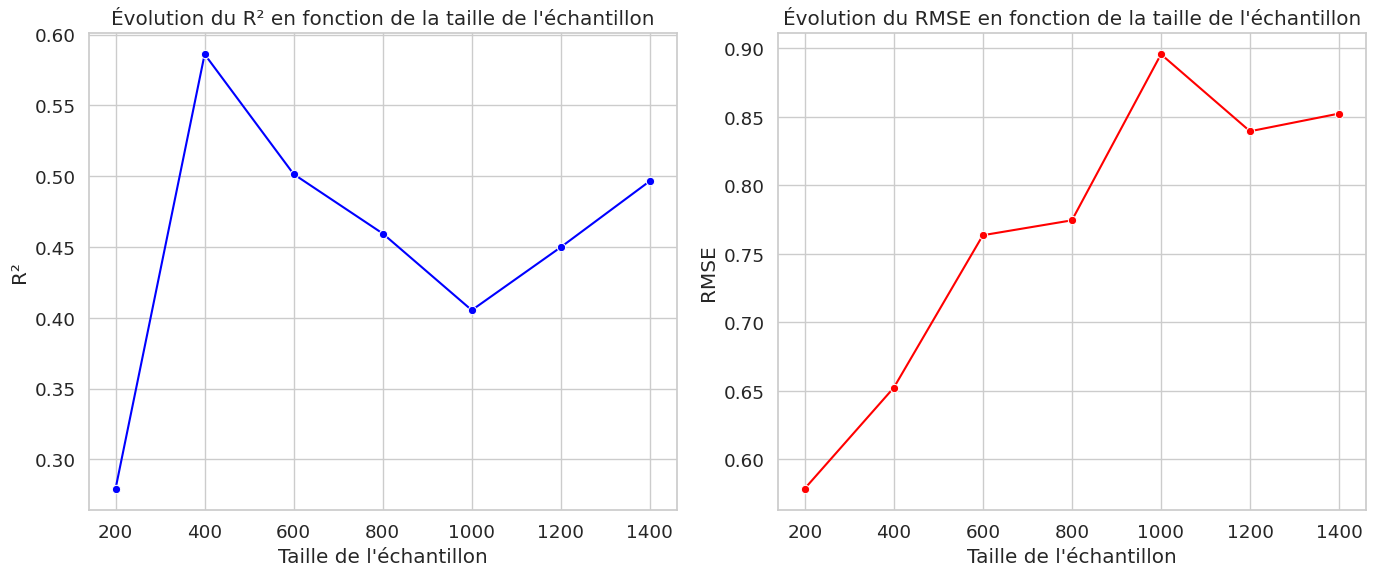

In [ ]:
X = Data.drop(columns=['FSM'])
y = Data['FSM']

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

results_xgb = {'sample_size': [], 'R2': [], 'RMSE': []}
param_grid_xgb = {
   'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.9, 1.0]
}

for size in sample_sizes:
    X_sample = X.iloc[:size]
    y_sample = y.iloc[:size]

    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    grid = GridSearchCV(
        XGBRegressor(random_state=42, verbosity=0),
        param_grid_xgb, cv=5, scoring='r2', n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results_xgb['sample_size'].append(size)
    results_xgb['R2'].append(r2)
    results_xgb['RMSE'].append(rmse)

df_results_xgb_GS= pd.DataFrame(results_xgb)
print("Résultats XGBoost :")
print(df_results_xgb_GS)


# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

# Création de la figure pour afficher les deux graphiques
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_xgb_GS, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_xgb_GS, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

# **RANDOM FOREST**

Résultats Random Forest Regressor :
   sample_size        R2      RMSE
0          200  0.298010  0.571043
1          400  0.594606  0.645594
2          600  0.540375  0.733177
3          800  0.457041  0.776255
4         1000  0.422169  0.883004
5         1200  0.460297  0.831525
6         1400  0.526021  0.827148


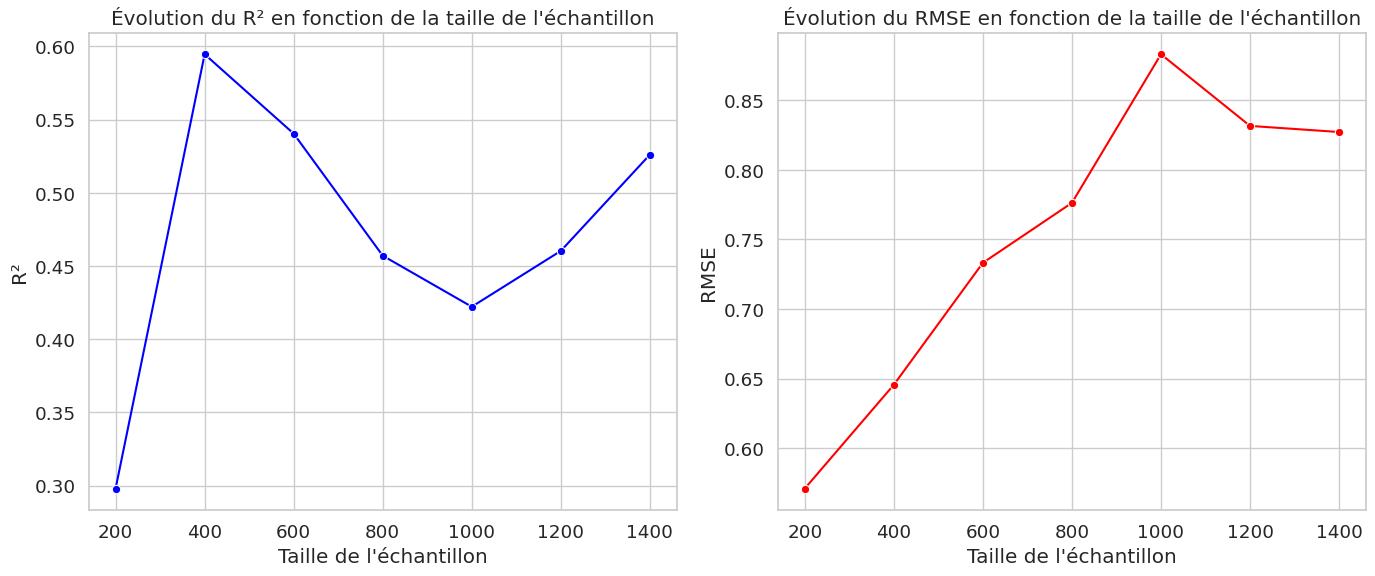

In [ ]:
X = Data.drop(columns=['FSM'])
y = Data['FSM']

# Dictionnaire pour enregistrer les résultats
results_rf = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    X_sample = X.iloc[:size]
    y_sample = y.iloc[:size]

    # Séparation en train et test (80% pour l'entraînement, 20% pour le test)
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    # Modèle Random Forest Regressor
    modelRF = RandomForestRegressor(random_state=42)
    modelRF.fit(X_train, y_train)

    # Prédictions et calcul des métriques
    y_pred = modelRF.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Enregistrement des résultats dans le dictionnaire
    results_rf['sample_size'].append(size)
    results_rf['R2'].append(r2)
    results_rf['RMSE'].append(rmse)

# Convertir le dictionnaire en DataFrame
df_results_rf = pd.DataFrame(results_rf)

# Affichage des résultats
print("Résultats Random Forest Regressor :")
print(df_results_rf)

# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

# Création de la figure pour afficher les deux graphiques
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_rf, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_rf, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


**Optimisation des paramètres**

Résultats Random Forest avec GridSearch :
   sample_size        R2      RMSE
0          200  0.291291  0.573769
1          400  0.594606  0.645594
2          600  0.547100  0.727793
3          800  0.454730  0.777905
4         1000  0.422169  0.883004
5         1200  0.460297  0.831525
6         1400  0.526021  0.827148


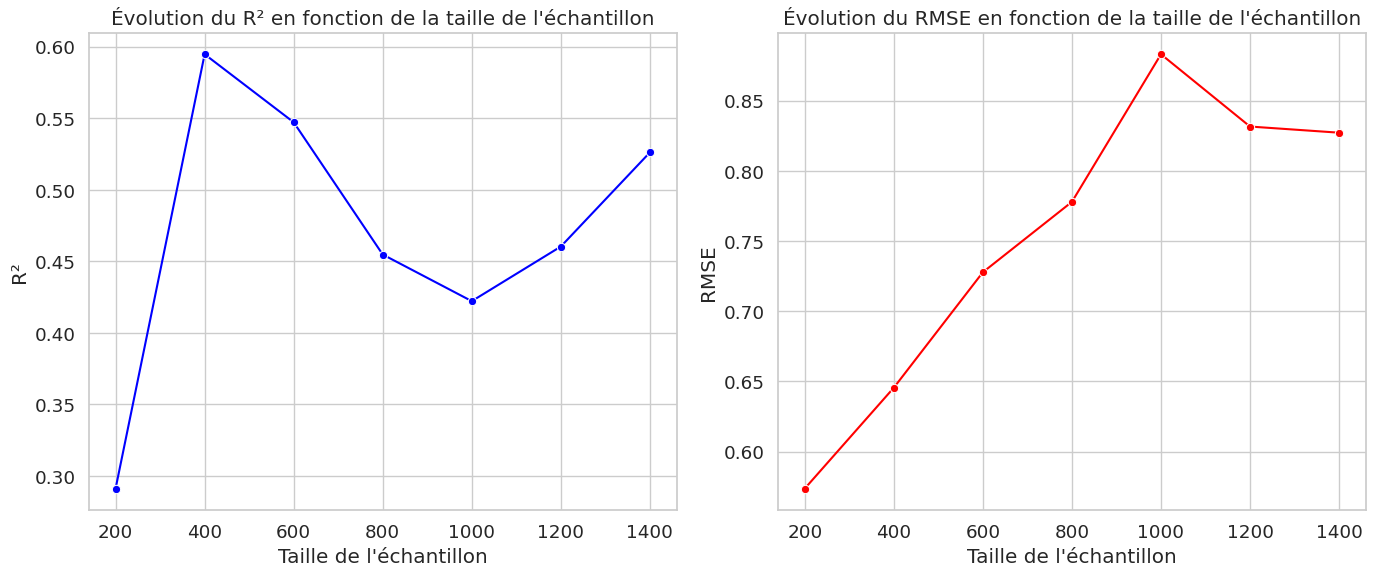

In [ ]:
X = Data.drop(columns=['FSM'])
y = Data['FSM']

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Dictionnaire pour stocker les résultats
results_rf = {'sample_size': [], 'R2': [], 'RMSE': []}

# Grille d'hyperparamètres Random Forest
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}


# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    X_sample = X.iloc[:size]
    y_sample = y.iloc[:size]

    # Split train / test
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    # Grid Search avec Random Forest
    grid = GridSearchCV(
        RandomForestRegressor(random_state=42, n_jobs=-1),
        param_grid_rf,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results_rf['sample_size'].append(size)
    results_rf['R2'].append(r2)
    results_rf['RMSE'].append(rmse)

# Convertir les résultats en DataFrame
df_results_rf_GS = pd.DataFrame(results_rf)

# Affichage des résultats
print("Résultats Random Forest avec GridSearch :")
print(df_results_rf_GS)

# Visualisation
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_rf_GS, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_rf_GS, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

# **ARBRE DE DECISION**

Résultats Decision Tree Regressor :
   sample_size        R2      RMSE
0          200 -1.048305  0.975440
1          400  0.257936  0.873457
2          600  0.301517  0.903826
3          800 -0.085085  1.097370
4         1000 -0.175379  1.259365
5         1200 -0.065624  1.168423
6         1400  0.023811  1.187054


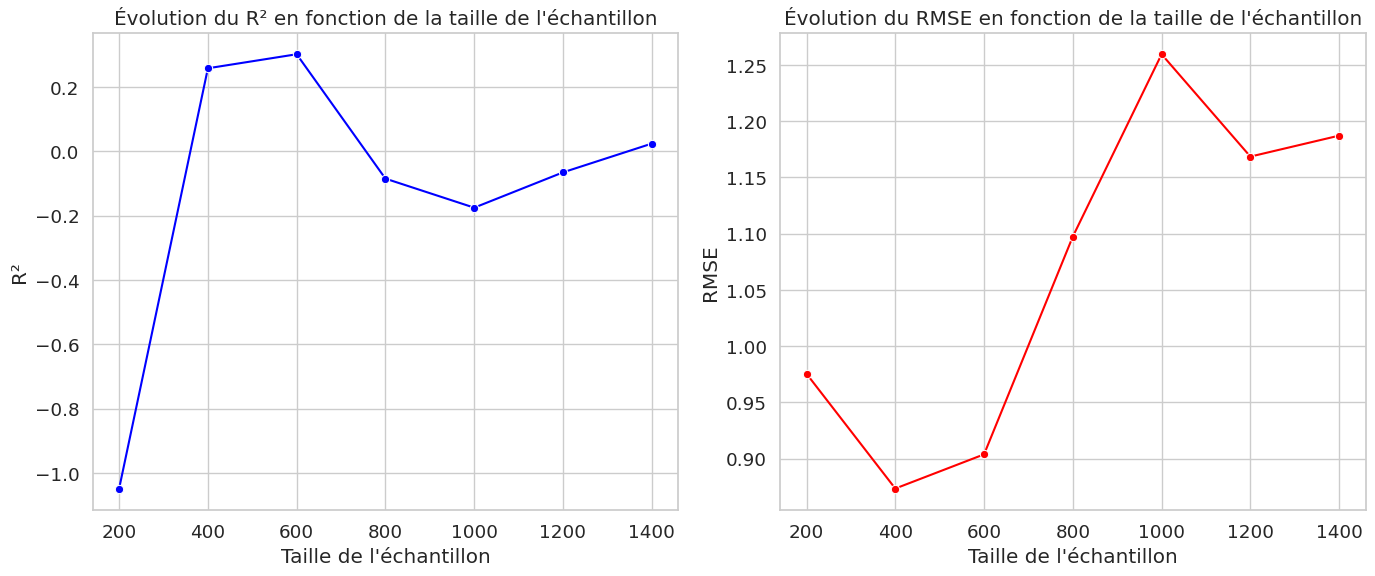

In [ ]:
X = Data.drop(columns=['FSM'])
y = Data['FSM']

# Dictionnaire pour enregistrer les résultats
results_tree = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    X_sample = X.iloc[:size]
    y_sample = y.iloc[:size]

    # Séparation en train et test (80% pour l'entraînement, 20% pour le test)
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    # Modèle Arbre de Décision
    model_tree = DecisionTreeRegressor(random_state=42)
    model_tree.fit(X_train, y_train)

    # Prédictions et calcul des métriques
    y_pred = model_tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Enregistrement des résultats dans le dictionnaire
    results_tree['sample_size'].append(size)
    results_tree['R2'].append(r2)
    results_tree['RMSE'].append(rmse)

# Convertir le dictionnaire en DataFrame
df_results_tree = pd.DataFrame(results_tree)

# Affichage des résultats
print("Résultats Decision Tree Regressor :")
print(df_results_tree)

# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

# Création de la figure pour afficher les deux graphiques
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_tree, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_tree, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


**Optimisation des paramètres**

Résultats Decision Tree avec GridSearch :
   sample_size        R2      RMSE
0          200 -0.124065  0.722602
1          400  0.410977  0.778192
2          600  0.416395  0.826165
3          800  0.283373  0.891800
4         1000  0.248109  1.007256
5         1200  0.330989  0.925795
6         1400  0.456044  0.886106


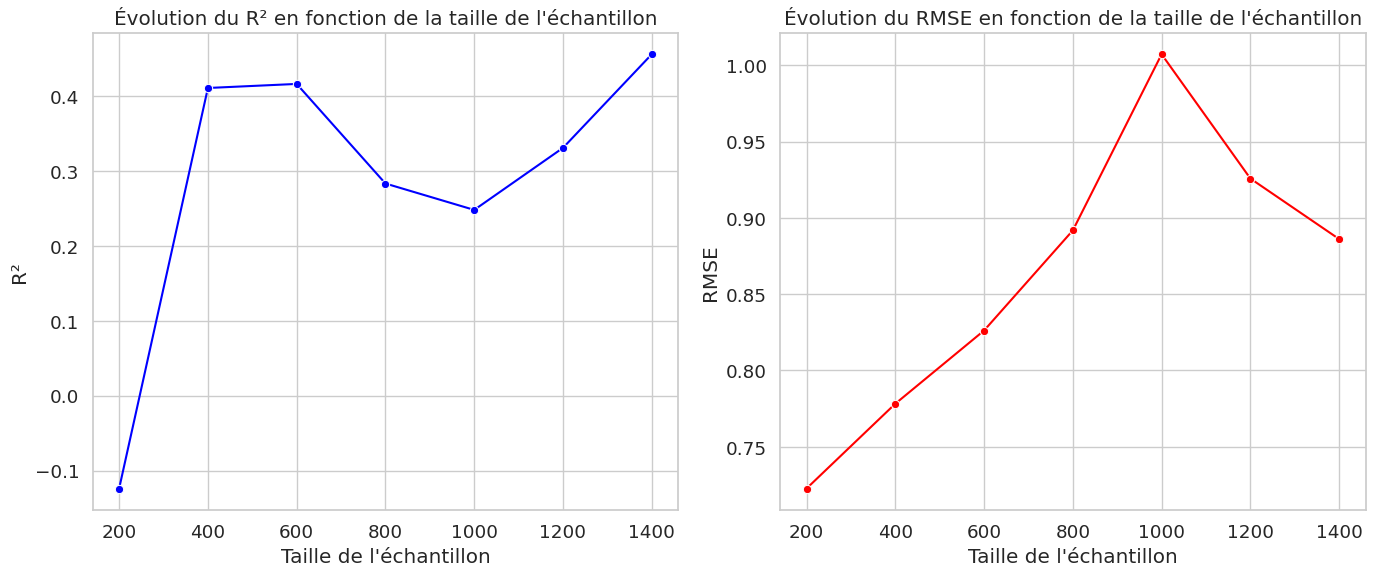

In [ ]:
X = Data.drop(columns=['FSM'])
y = Data['FSM']

# Dictionnaire pour enregistrer les résultats
results_dt = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Grille d'hyperparamètres pour DecisionTree
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    X_sample = X.iloc[:size]
    y_sample = y.iloc[:size]

    # Split train / test
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    # Grid Search sur DecisionTree
    grid = GridSearchCV(
        DecisionTreeRegressor(random_state=42),
        param_grid_dt,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results_dt['sample_size'].append(size)
    results_dt['R2'].append(r2)
    results_dt['RMSE'].append(rmse)

# Convertir le dictionnaire en DataFrame
df_results_dt_GS = pd.DataFrame(results_dt)

# Affichage des résultats
print("Résultats Decision Tree avec GridSearch :")
print(df_results_dt_GS)

# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_dt_GS, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_dt_GS, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()


# **SUPPORT VECTOR REGRESSION**

Résultats Support Vector Regression :
   sample_size        R2      RMSE
0          200  0.086145  0.651541
1          400  0.420463  0.771901
2          600  0.485884  0.713448
3          800  0.471983  0.806603
4         1000  0.466108  0.828084
5         1200  0.463513  0.814306
6         1400  0.427348  0.825166


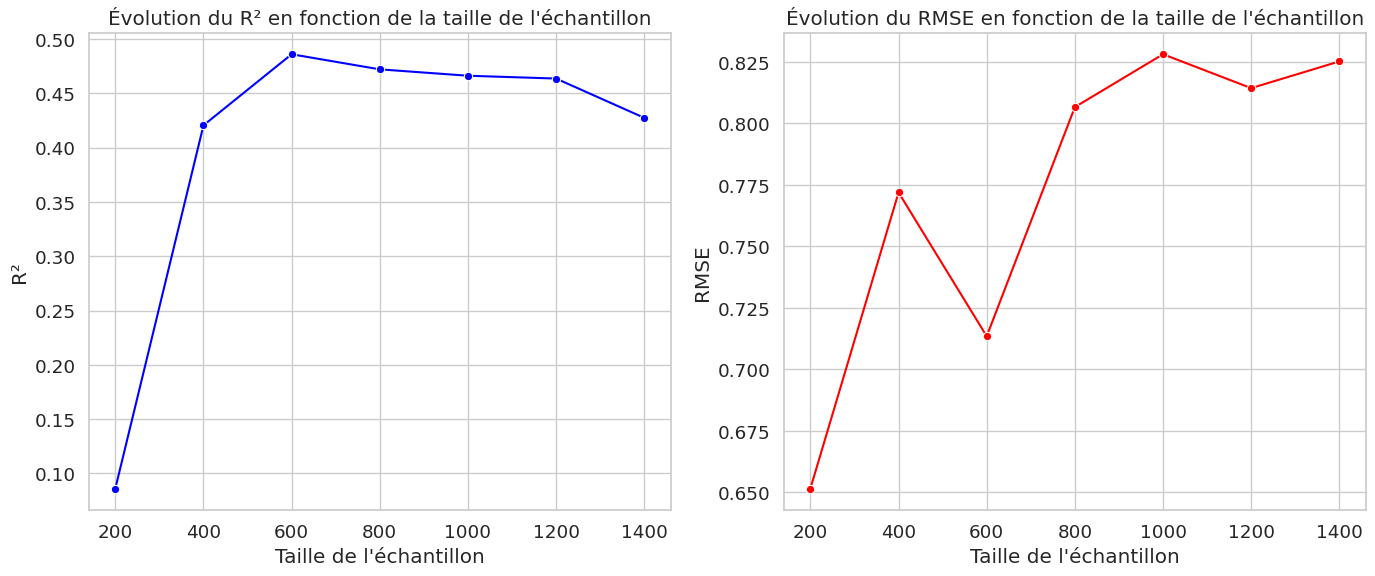

In [ ]:
# X et y sont déjà définis
X = Data.drop(columns=['FSM'])
y = Data['FSM']

# Dictionnaire pour enregistrer les résultats
results_svr = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    X_sample = X.iloc[:size]
    y_sample = y.iloc[:size]

    # Séparation en train et test (80% entraînement, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    # Modèle SVR avec paramètres par défaut
    modelSVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    modelSVR.fit(X_train, y_train)

    # Prédictions et calcul des métriques
    y_pred = modelSVR.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Enregistrement des résultats dans le dictionnaire
    results_svr['sample_size'].append(size)
    results_svr['R2'].append(r2)
    results_svr['RMSE'].append(rmse)

# Convertir le dictionnaire en DataFrame avec index
df_results_svr = pd.DataFrame(results_svr)

# Affichage des résultats
print("Résultats Support Vector Regression :")
print(df_results_svr)

# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

# Création de la figure pour afficher les deux graphiques
plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_svr, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_svr, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


**Optimisation des hyperparamètres**

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Résultats SVR avec GridSearch :
   sample_size        R2      RMSE
0          200  0.236193  0.595656
1          400  0.379997  0.798394
2          600  0.491894  0.709266
3          800  0.448529  0.824323
4         1000  0.489058  0.810091
5         1200  0.473396  0.806771
6         1400  0.429795  0.823402


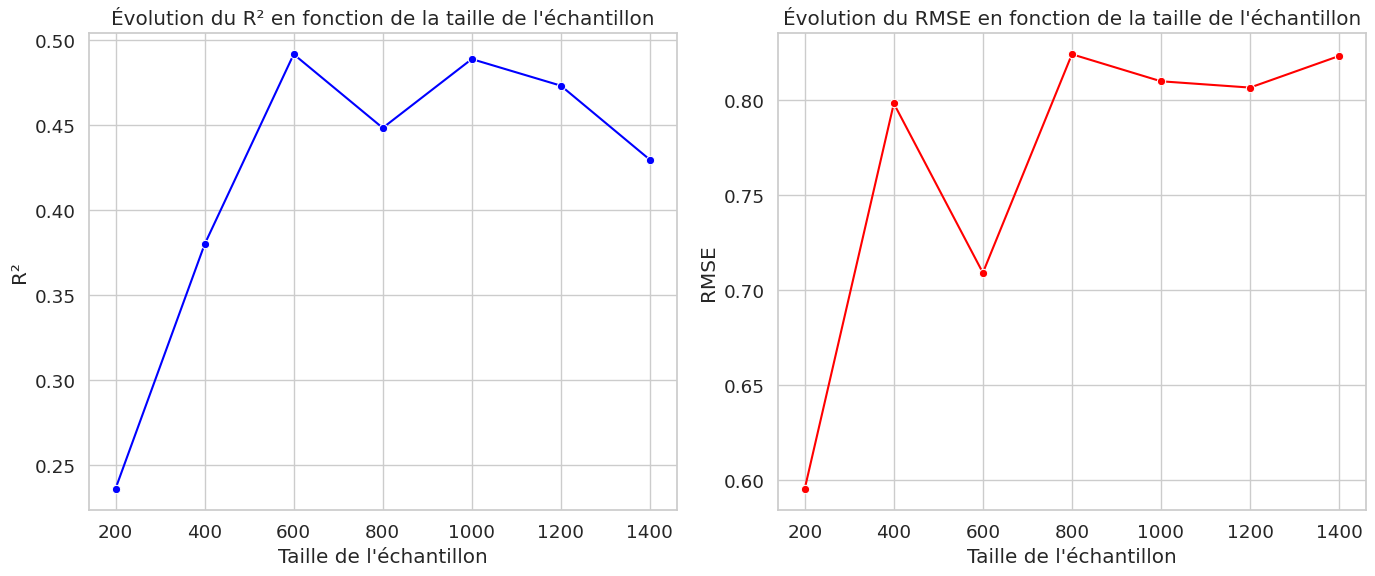

In [ ]:
# X et y sont déjà définis
X = Data.drop(columns=['FSM'])
y = Data['FSM']

# Dictionnaire pour stocker les résultats
results_svr = {'sample_size': [], 'R2': [], 'RMSE': []}

# Définition des tailles d'échantillon
sample_sizes = [200, 400, 600, 800, 1000, 1200, 1400]

# Grille d'hyperparamètres SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# Boucle sur les tailles d'échantillons
for size in sample_sizes:
    X_sample = X.iloc[:size]
    y_sample = y.iloc[:size]

    # Séparation en train et test
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    # Grid Search avec SVR
    grid = GridSearchCV(
        SVR(),
        param_grid_svr,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results_svr['sample_size'].append(size)
    results_svr['R2'].append(r2)
    results_svr['RMSE'].append(rmse)

# Convertir les résultats en DataFrame
df_results_svr = pd.DataFrame(results_svr)

# Affichage des résultats
print("Résultats SVR avec GridSearch :")
print(df_results_svr)

# Visualisation avec seaborn et matplotlib
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(14, 6))

# Graphique R²
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_svr, x='sample_size', y='R2', marker='o', color='blue')
plt.title('Évolution du R² en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R²')
plt.grid(True)

# Graphique RMSE
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_svr, x='sample_size', y='RMSE', marker='o', color='red')
plt.title('Évolution du RMSE en fonction de la taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()
